# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [55]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd


# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns
sns.set_theme()


# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt



# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor



# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [56]:
# READ IN THE DATA USING PANDAS
df = pd.read_csv('data/winequality-white.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 45.0                 170.0  3.00       0.45      8.8   
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
4                 47.0                 186.0  3.19       0.40      9.9   

   quality  
0        6  
1        6  
2        6  
3        6  
4        6

# Inspect our data using `df.describe()` function.

In [57]:
# Inspect our data using `df.describe()` function.
df.describe().transpose()

count        mean        std    min      25%      50%  \
fixed acidity         4893.0    6.854210   0.843637  3.800    6.300    6.800   
volatile acidity      4893.0    0.278221   0.100831  0.080    0.210    0.260   
citric acid           4893.0    0.334139   0.121048  0.000    0.270    0.320   
residual sugar        4893.0    6.393736   5.072990  0.600    1.700    5.200   
chlorides             4893.0    0.045791   0.021850  0.009    0.036    0.043   
free sulfur dioxide   4893.0   35.310035  17.011384  2.000   23.000   34.000   
total sulfur dioxide  4893.0  138.383507  42.509982  9.000  108.000  134.000   
pH                    4893.0    3.188144   0.151011  2.720    3.090    3.180   
sulphates             4893.0    0.489871   0.114151  0.220    0.410    0.470   
alcohol               4893.0   10.512565   1.229755  8.000    9.500   10.400   
quality               4893.0    5.874719   0.880446  3.000    5.000    6.000   

                         75%      max  
fixed acidity           7.30   14.200  
volatile acidity        0.32    1.100  
citric acid             0.39    1.660  
residual sugar          9.90   65.800  
chlorides               0.05    0.346  
free sulfur dioxide    46.00  289.000  
total sulfur dioxide  167.00  440.000  
pH                      3.28    3.820  
sulphates               0.55    1.080  
alcohol                11.40   14.200  
quality                 6.00    8.000

# Check for Nulls.

In [58]:
# Check for Nulls.
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# Check for Duplicates

In [59]:
# Check for Duplicates
df.duplicated().sum()

937

In [60]:
# Remove duplicates
print(df.shape)


# REMOVE DUPLICATES HERE
df = df.drop_duplicates()

# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

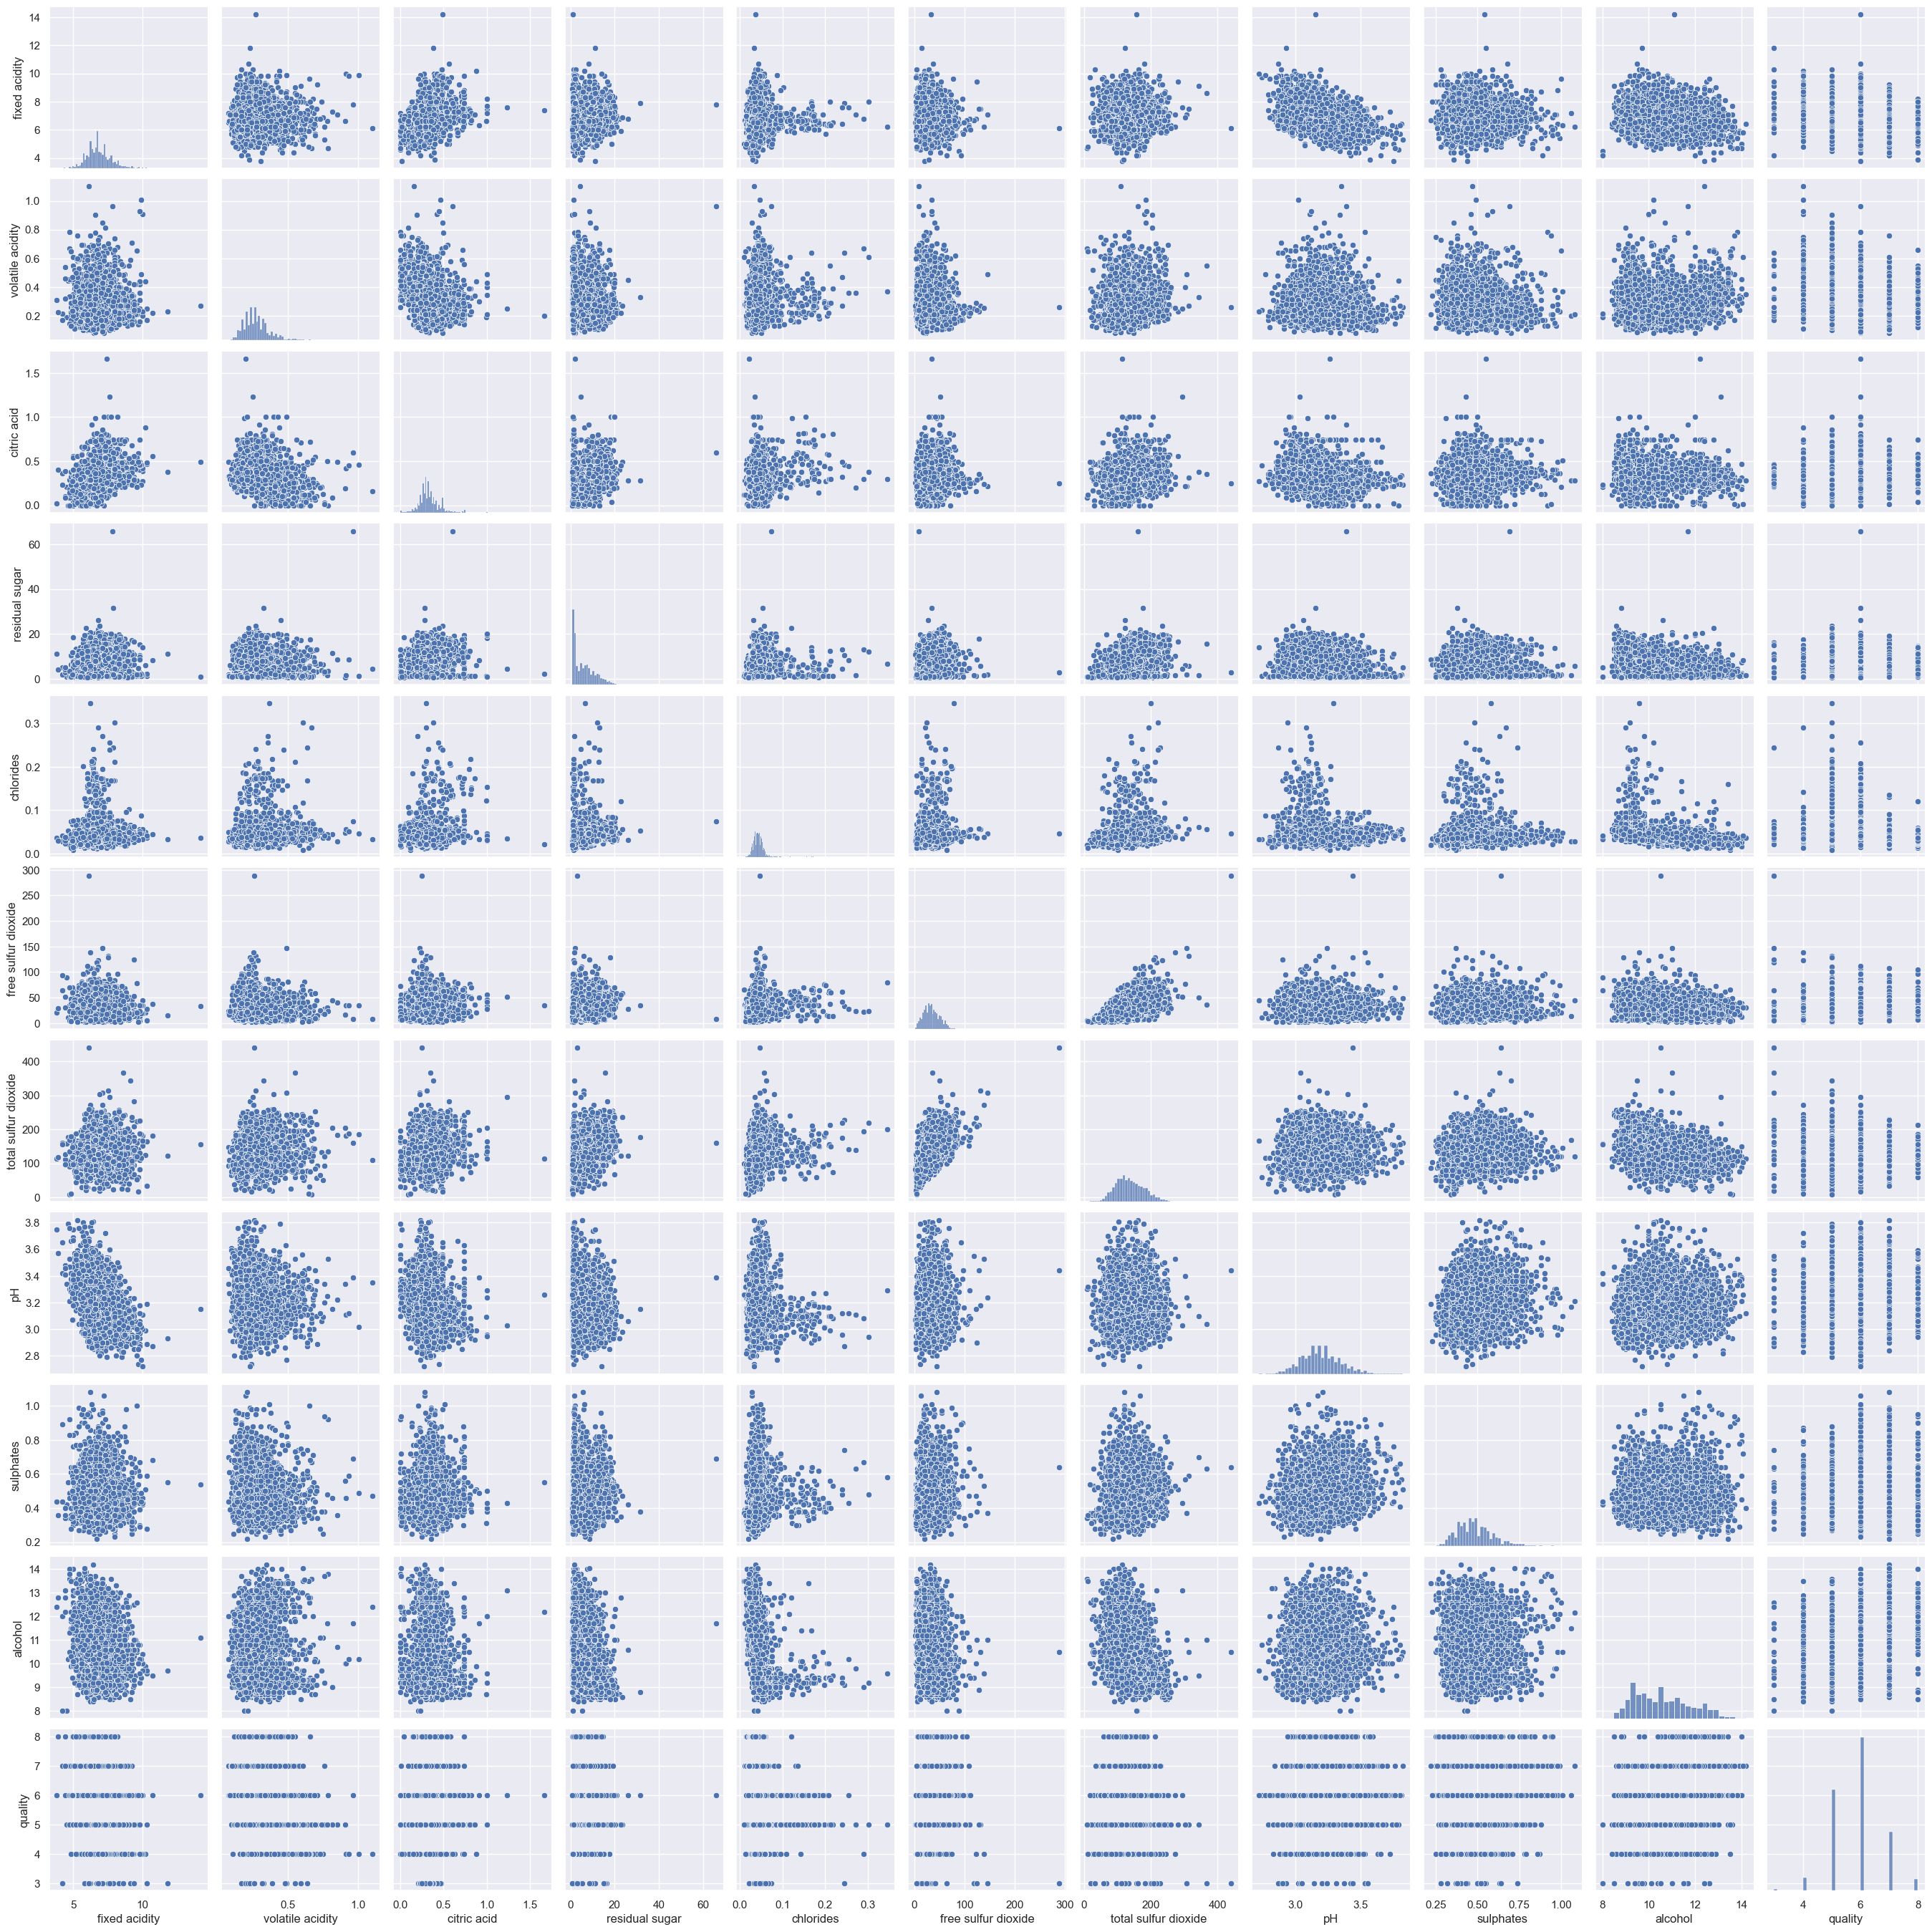

In [61]:
# Visualize our data to discover outliers.
sns.pairplot(df)

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [62]:
lol = df.columns.to_list()
lol

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [63]:


# Keep this for later
original_cols = df.columns
# Set the columns you want to remove outliers for
target_cols = ['total sulfur dioxide', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'pH',
       'sulphates', 'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + '_zscore'

    # Set the new column equal to the z-score
    df[new_col_name] = scipy.stats.zscore(df[col])

    # Set the z-score to its absolute value for easier filtering
    df[new_col_name] = abs(df[new_col_name])

    # Append the new column name to our z_score_cols list for easier access later.
    z_score_cols.append(new_col_name)

print('Before removal of outliers', df.shape)

# Loop through each z-score column and filter outliers
for col in z_score_cols:
    condition = df[col] < 3
    df = df[condition]

print('After removal of outliers', df.shape)


Before removal of outliers (3956, 21)
After removal of outliers (3629, 21)


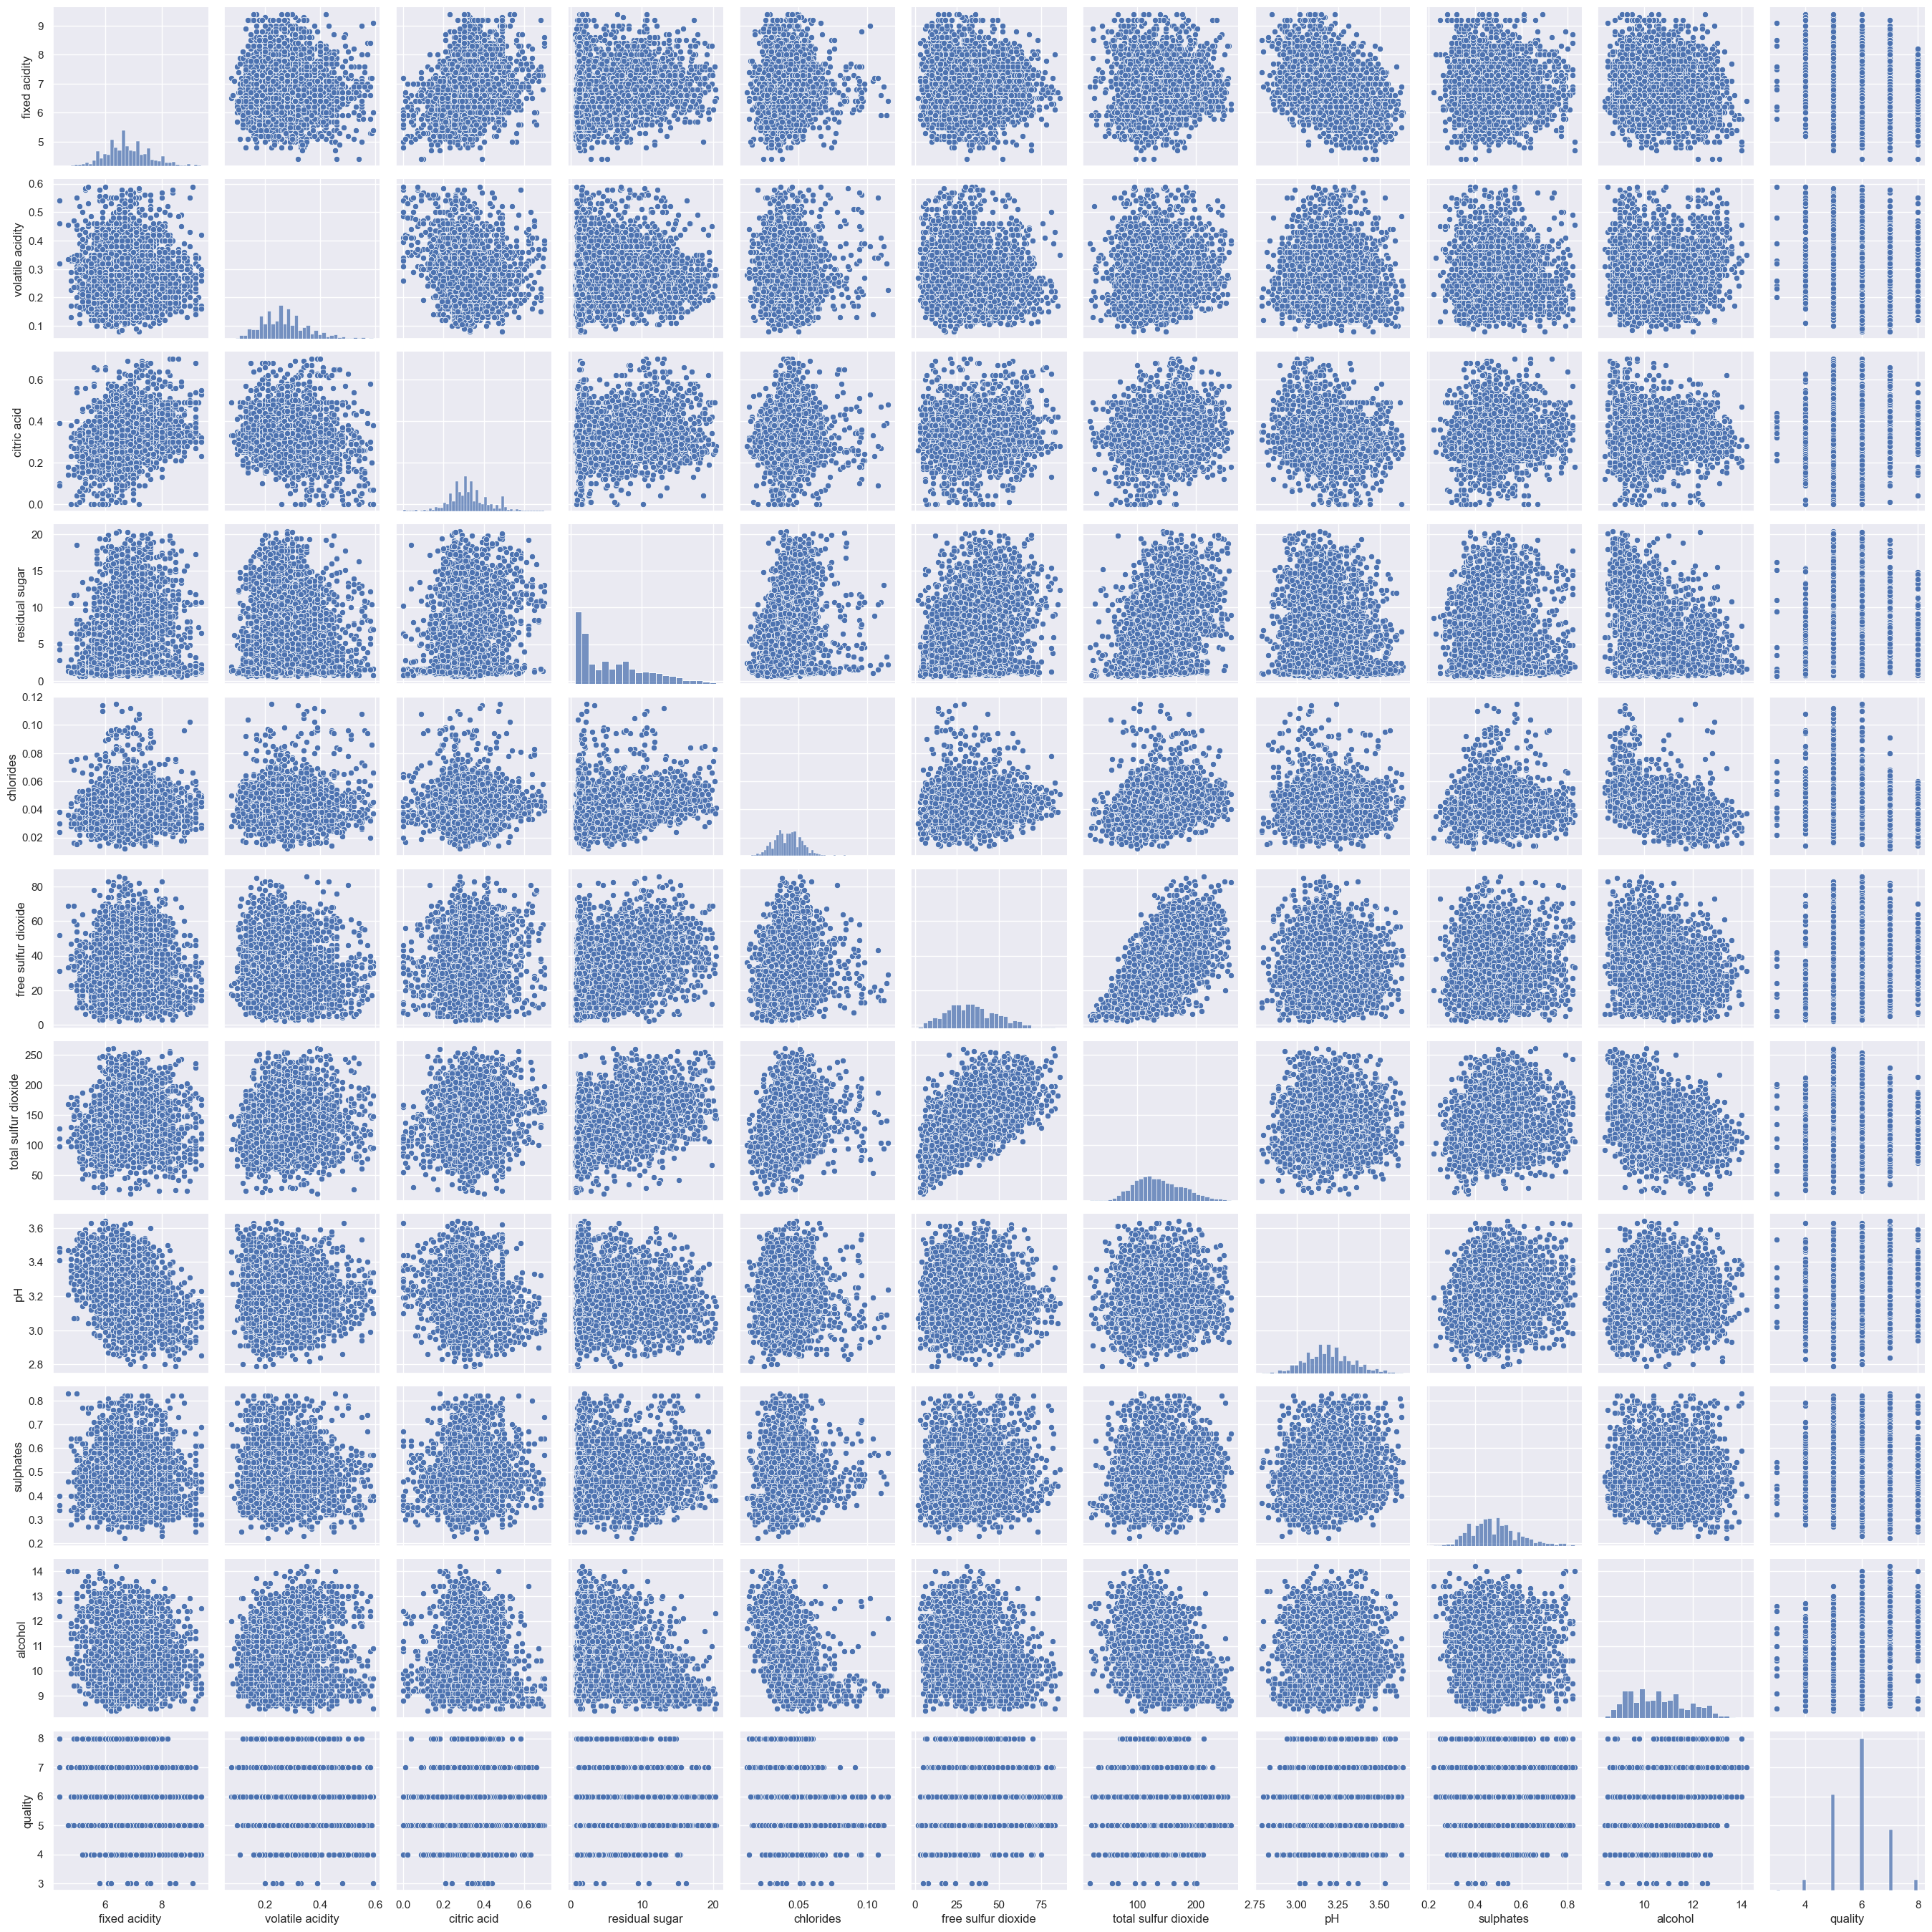

In [64]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed.
sns.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

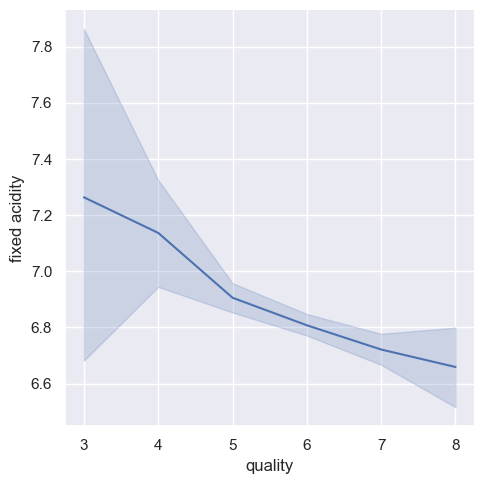

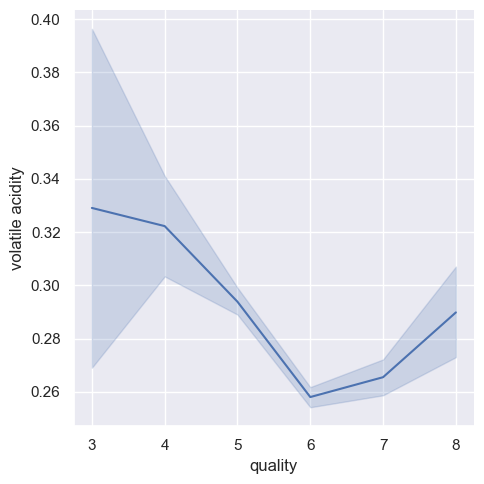

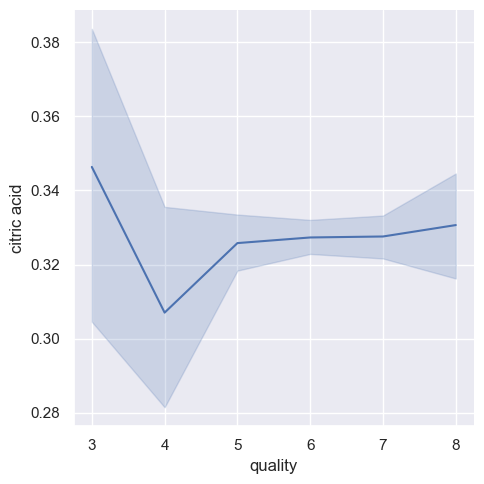

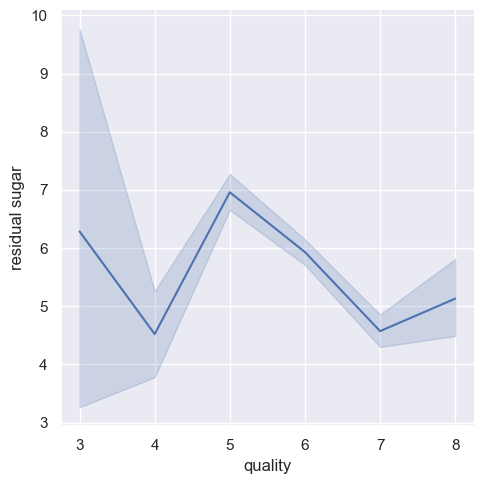

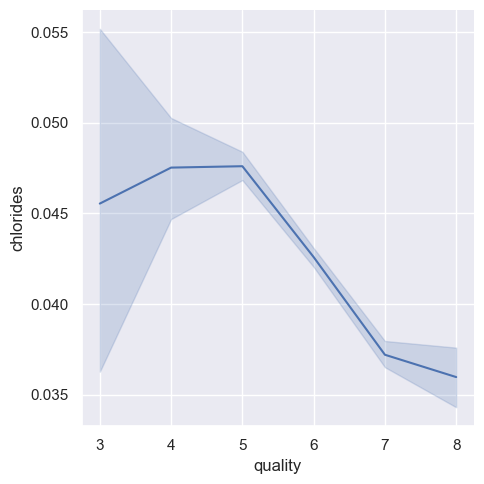

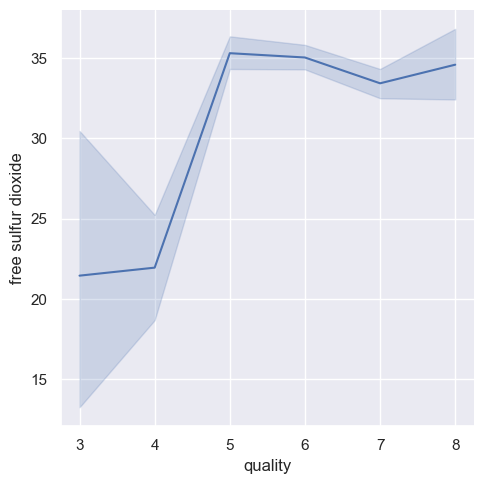

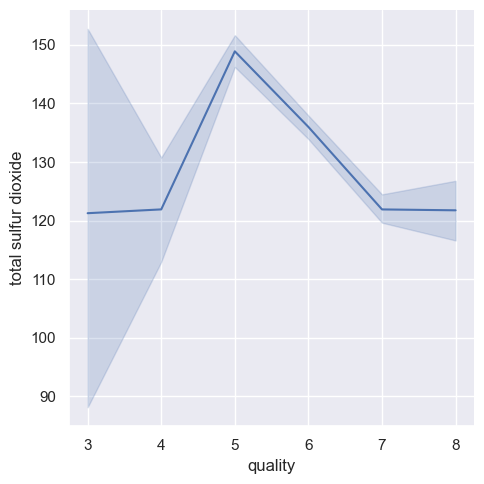

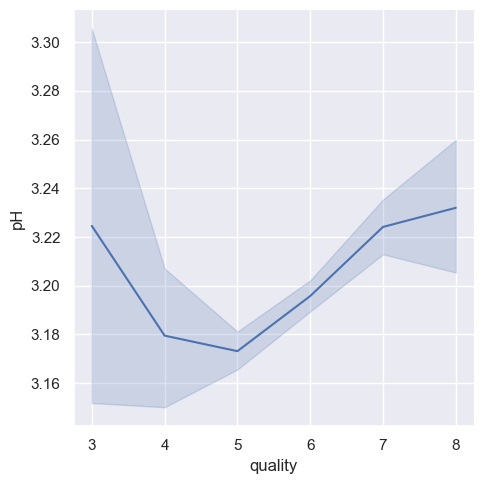

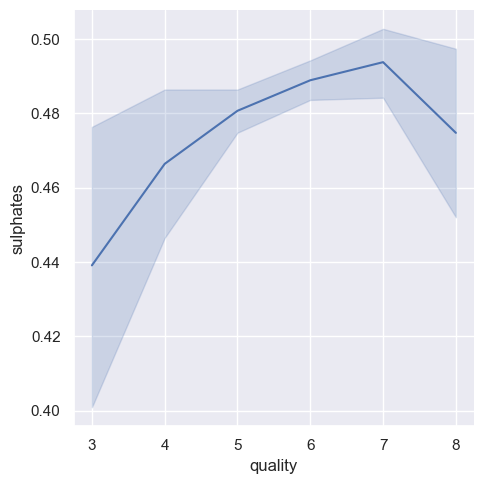

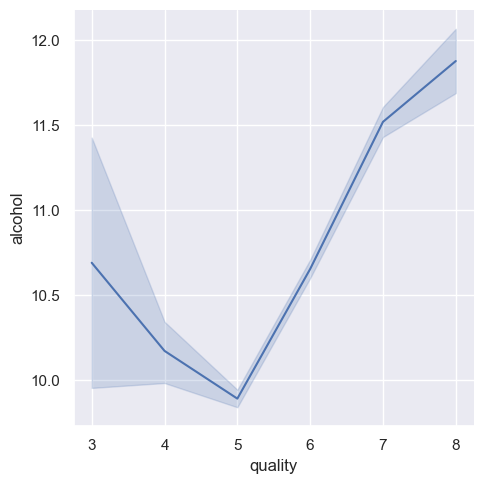

In [65]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for col in all_features:

    sns.relplot(df, x='quality', y=col, kind = 'line' )


# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [66]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'volatile acidity',
               'chlorides', 'free sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

In [67]:
# Define your X and y variables
X = df[selected_features].values

#
y = df[['quality']].values

In [68]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state = 1)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [69]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()

In [70]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train, y_train)

LinearRegression()

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [71]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [72]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.3165874203957698
Mean Absolute Error: 0.568155642971671


In [73]:
# GET THE COEFFICIENT VALUES FROM THE MODEL
coefficient_values = model.coef_

# MAKE A DATA FRAME OUT OF THE VALUES AND THEIR COLUMN NAMES
df_coefficients = pd.DataFrame(coefficient_values, columns=selected_features).T

# RENAME THE COLUMN FROM 0 TO COEFFICIENT
df_coefficients.columns = ['coefficient']

# DISPLAY THE DATA FRAME
df_coefficients

coefficient
fixed acidity          -0.025785
volatile acidity       -1.426879
chlorides              -5.742127
free sulfur dioxide     0.008699
pH                      0.354052
sulphates               0.389221
alcohol                 0.334695

# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [74]:
import pickle

# NAME YOUR MODEL
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))


___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [75]:
# Do complete Random Forest Regression model here...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2 , random_state=1)

model = RandomForestRegressor(n_estimators=500, max_depth = 10, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print('R-Squared Score with linear:', r_squared)


# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
print("Mean Absolute Error with linear:", mae)





#

c:\Users\adwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-Squared Score with linear: 0.3165874203957698
Mean Absolute Error with linear: 0.568155642971671


In [76]:
# 1. Which model proved to have better scores.
r_squared1 = metrics.r2_score(y_test, y_pred)
print('R-Squared Score with randomforest:', r_squared1)


# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae1 = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with randomforest:", mae1)

R-Squared Score with randomforest: 0.3744408610345027
Mean Absolute Error with randomforest: 0.5466241792183884


In [77]:
# 2. Why do you think that is...?


print('Your answer here')

Your answer here


# Awesome Extra Credit, I highly suggest you do this.

Follow along with this [kaggle entry](https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/notebook) about doing all sorts of trick with regression to predict car prices.  There is data in the data folder called `car_prices_clean.csv` that did their preprocess stuff.  Their origianl data file is also in there as `car_prices.csv`.

They do some strange stuff in this tutorial.  Any questions you have we will answer next week during HW review. 


In [78]:
df = pd.read_csv('data/car_prices_clean.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/car_prices_clean.csv'